# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (Scaling in)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [18]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [19]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [20]:
period = 7

Define max number of positions to scale into

In [21]:
max_positions = 1

Define the margin multiple

In [22]:
margin = 1

Run Strategy

In [23]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions, stop_loss_pct=85, margin=margin)
s.run()

Retrieve log DataFrames

In [24]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [25]:
s.rlog.tail(10)

,date,price,shares,entry_exit,direction,symbol
520,2019-09-20,298.28,209,entry,LONG,SPY
521,2019-10-11,296.28,209,exit,LONG,SPY
522,2019-12-03,309.55,200,entry,LONG,SPY
523,2019-12-12,317.13,200,exit,LONG,SPY
524,2020-01-27,323.50,196,entry,LONG,SPY
525,2020-02-04,329.06,196,exit,LONG,SPY
526,2020-02-21,333.48,194,entry,LONG,SPY
527,2020-03-04,312.86,194,exit,LONG,SPY
528,2020-06-24,304.09,199,entry,LONG,SPY
529,2020-07-02,312.23,199,exit,LONG,SPY


In [26]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
255,2019-05-01,291.81,2019-05-03,294.03,2.22,472.86,213,52646.20,LONG,SPY
256,2019-05-07,287.93,2019-06-05,282.96,-4.97,-1078.49,217,51567.71,LONG,SPY
257,2019-06-26,290.47,2019-07-01,295.66,5.19,1095.09,211,52662.80,LONG,SPY
258,2019-07-19,297.17,2019-07-24,301.44,4.27,896.70,210,53559.49,LONG,SPY
259,2019-07-31,297.43,2019-08-29,292.58,-4.85,-1033.05,213,52526.44,LONG,SPY
260,2019-09-20,298.28,2019-10-11,296.28,-2.00,-418.00,209,52108.44,LONG,SPY
261,2019-12-03,309.55,2019-12-12,317.13,7.58,1516.00,200,53624.45,LONG,SPY
262,2020-01-27,323.50,2020-02-04,329.06,5.56,1089.76,196,54714.21,LONG,SPY
263,2020-02-21,333.48,2020-03-04,312.86,-20.62,-4000.28,194,50713.92,LONG,SPY
264,2020-06-24,304.09,2020-07-02,312.23,8.14,1619.86,199,52333.78,LONG,SPY


In [27]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-07-09,62333.78,62333.78,62333.78,0,62333.78,1.00,-
2020-07-10,62333.78,62333.78,62333.78,0,62333.78,1.00,-
2020-07-13,62333.78,62333.78,62333.78,0,62333.78,1.00,-
2020-07-14,62333.78,62333.78,62333.78,0,62333.78,1.00,-
2020-07-15,62333.78,62333.78,62333.78,0,62333.78,1.00,-


Generate strategy stats - display all available stats

In [28]:
pf.print_full(stats)

start                                                  1993-11-11
end                                                    2020-07-15
beginning_balance                                           10000
ending_balance                                           62333.78
total_net_profit                                         52333.78
gross_profit                                             97524.86
gross_loss                                              -45191.08
profit_factor                                                2.16
return_on_initial_capital                                  523.34
annual_return_rate                                           7.10
trading_period                           26 years 8 months 4 days
pct_time_in_market                                          29.65
margin                                                          1
avg_leverage                                                 1.00
max_leverage                                                 1.00
min_levera

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [29]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-15 00:00:00 SELL 215 SPY @ 321.85


Plot Equity Curves: Strategy vs Benchmark

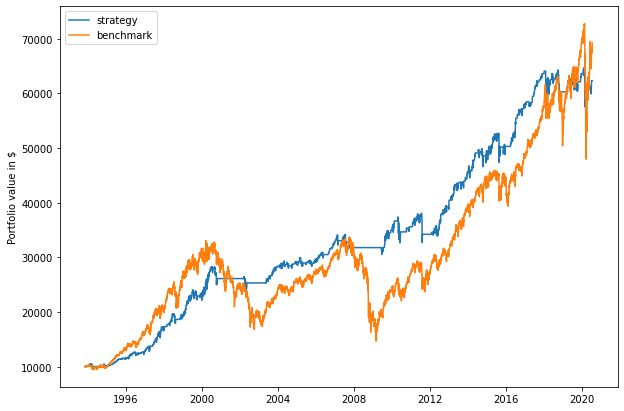

In [30]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

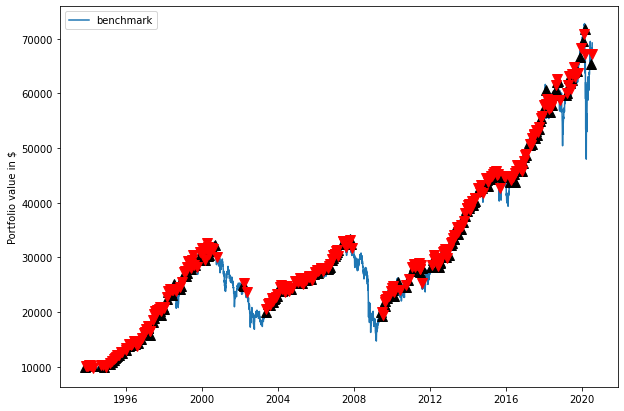

In [31]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,7.10,7.52
max_closed_out_drawdown,-14.63,-56.42
drawdown_annualized_return,-2.06,-7.50
drawdown_recovery,-1.84,-1.42
best_month,12.88,23.06
worst_month,-13.54,-31.38
sharpe_ratio,0.75,0.48
sortino_ratio,0.55,0.60
monthly_std,2.11,4.54


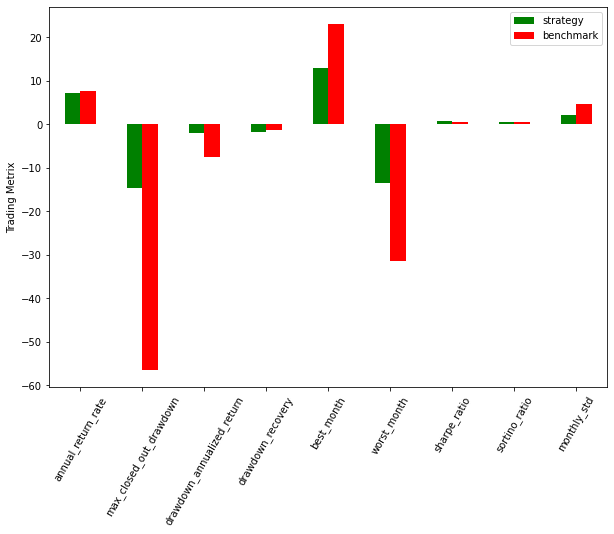

In [32]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df